In [3]:
from mushroom import *

c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support fo

Next, we test PCA and K-Means clustering with embedding images and labels of the names of the species. We test this with 1. just 2 mushrooms that look evidently different. 2. just 2 mushrooms that look very similar (one poisonous, one not)
3.. etc. 

In [4]:
#indices on the right
ALL_LABELS = [
    "Beechwood Sickener", #0
    "Beefsteak Fungus", #1
    "Chanterelle", #2
    "Deadly Webcap", #3
    "Deathcap", #4
    "Destroying Angel", #5
    "Field Mushroom", #6
    "Fly Agaric", #7
    "Funeral Bell", #8
    "Sheathed Woodtuft" #9
]

1. Very different looking mushrooms. Fly agaric and Funeral bell (one non-poisonous, one poisonous respectively)

In [ ]:
pair1 = [ALL_LABELS[7], ALL_LABELS[8]]

fa_embed = embed_first_n_images("mushrooms/fly_agaric", n = 8)
fb_embed = embed_first_n_images("mushrooms/funeral_bell", n = 8)
pair_embed = np.vstack([fa_embed, fb_embed])

lab_embed = embed_label_prompts(pair1)

combined_embed = combine_embeds(pair_embed, lab_embed)


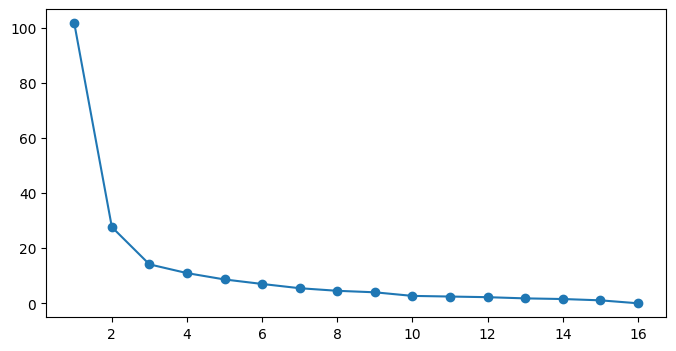

In [6]:
#first, run pca to find out how many principal compnents are most important
#n max is how many images there are 
reduced1, pca1 = run_pca(combined_embed, n = 16)
plot_eigenvalues(pca1)

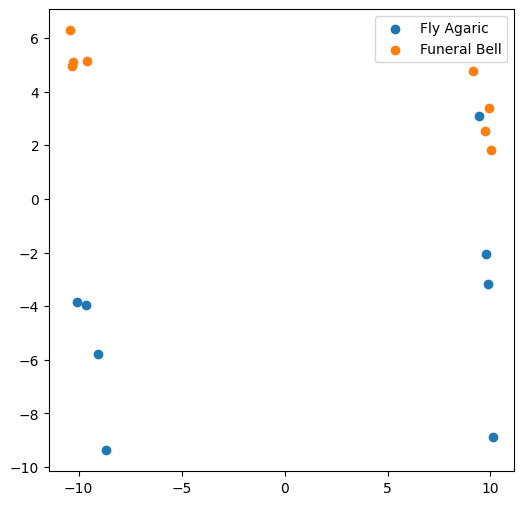

In [7]:
#based on that ^ we can just use the first 6 principal components max
#but first we'll plot pca with two to 2D visualize
reduced2, pca2 = run_pca(combined_embed, n = 2)
labels1 = np.repeat(pair1, 8)
plot_pca_2d(reduced2, labels = labels1, title = "2D PCA of Fly Agaric & Funeral Bell")

-0.07142857142857142


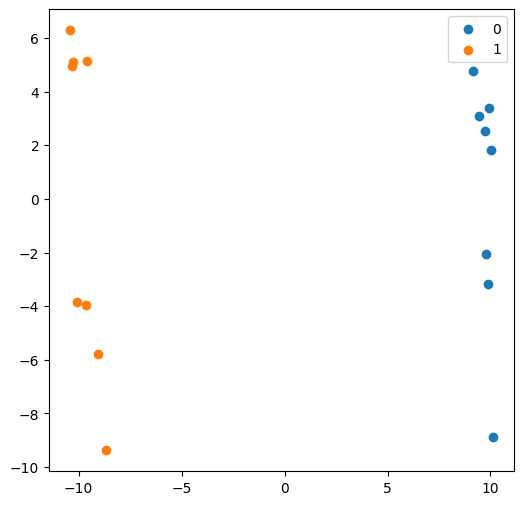

In [8]:
#now we use first 6 principal components for kmeans 
reduced3, pca3 = run_pca(combined_embed, n = 6)
cluster_labels1, kmeans1 = cluster(reduced3) #no need to change n bc there's 2 species we put in = 2 clusters
print(cluster_accuracy(labels1, cluster_labels1))

#need to use the reduced2 pca to plot 2d w kmeans
plot_pca_2d(reduced2, labels = cluster_labels1)

In [9]:
fa_images = [os.path.join("mushrooms/fly_agaric", f) for f in os.listdir("mushrooms/fly_agaric") if f.endswith(".png")]
fb_images = [os.path.join("mushrooms/funeral_bell", f) for f in os.listdir("mushrooms/funeral_bell") if f.endswith(".png")]

all_images = fa_images + fb_images

pair_labels = ["Fly Agaric", "Funeral Bell"]

predictions = classify_images(pipe, all_images, pair_labels)

print(predictions)


['Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric', 'Fly Agaric']


In [ ]:
#um what the heck! these are some lousy results!! 